In [51]:
## import data from a csv file

import pandas as pd
import matplotlib.pyplot as plt
import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

file = "C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv"
df = pd.read_csv(file)

# 1.clean the data by converting the job_posted_date into a datetime object from a string

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.month

df[['job_title_short','job_skills']].head(10)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."
5,Data Engineer,"['python', 'sql', 'gcp']"
6,Senior Data Engineer,"['sql', 'python', 'java', 'sql server', 'gcp',..."
7,Data Engineer,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu..."
8,Business Analyst,"['excel', 'powerpoint', 'power bi']"
9,Data Scientist,"['sql', 'python', 'r', 'mongodb', 'mongodb', '..."


In [52]:
df['job_skills']=df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else [])





In [53]:
df_exploded = df.explode('job_skills')

df_exploded.head(20)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,tableau,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,python,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,sql,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,c#,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10


In [54]:
skills_count = df_exploded['job_skills'].value_counts()
print(skills_count)


job_skills
sql            384849
python         380909
aws            145381
azure          132527
r              130892
                ...  
msaccess            1
visualbasic         1
gtx                 1
wimi                1
rocketchat          1
Name: count, Length: 252, dtype: int64


In [55]:
top_skills = skills_count.sort_values(ascending=False).head(5).index.to_list()
print(top_skills)

['sql', 'python', 'aws', 'azure', 'r']


In [56]:
## convert the date time into months in words


df_exploded['job_posted_date']=df_exploded['job_posted_date'].dt.strftime('%B')



In [57]:
df_top_skills = df_exploded[df_exploded['job_skills'].isin(top_skills)]
df_top_skills.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,January,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,January,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,January,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,October,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,python,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,October,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,sql,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10


In [ ]:

df_summary = df_top_skills.pivot_table(index = 'job_posted_date', columns= 'job_skills', aggfunc='size')






ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [ ]:
df_summary['month_no']=pd.to_datetime(df_summary.index, format='%B').month


In [60]:
df_summary.set_index('month_no')
df_summary

job_skills,aws,azure,python,r,sql,month_no
job_posted_date,,,,,,
April,11635,10557,30482,10647,31096,4
August,13817,12193,36228,13037,36699,8
December,10266,9437,26678,8367,26109,12
February,12219,11114,31943,11288,32720,2
January,16805,15385,44889,16351,45774,1
July,12017,10960,31257,10793,31869,7
June,11759,10793,31216,10820,31671,6
March,12458,11152,31990,11358,32282,3
May,10394,9111,26908,9339,27096,5


In [65]:
df_summary.sort_values(by='month_no',inplace=True)

In [66]:
df_summary

job_skills,aws,azure,python,r,sql,month_no
job_posted_date,,,,,,
January,16805,15385,44889,16351,45774,1
February,12219,11114,31943,11288,32720,2
March,12458,11152,31990,11358,32282,3
April,11635,10557,30482,10647,31096,4
May,10394,9111,26908,9339,27096,5
June,11759,10793,31216,10820,31671,6
July,12017,10960,31257,10793,31869,7
August,13817,12193,36228,13037,36699,8
September,10934,10221,28616,9248,28926,9


In [68]:
df_summary.drop(columns='month_no',inplace=True)

Text(0.5, 1.0, 'Top skills trends over the year')

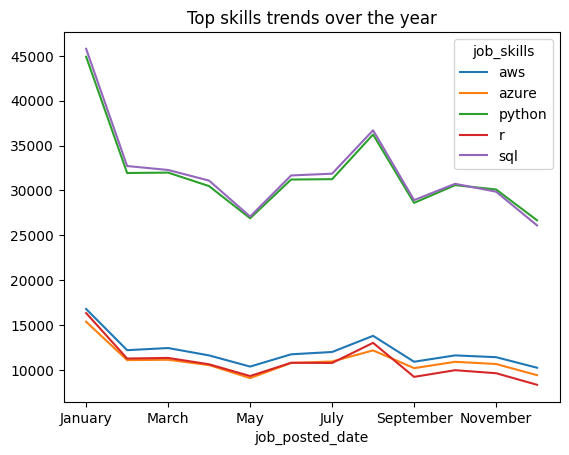

In [70]:
df_summary.plot(kind = 'line')
plt.title('Top skills trends over the year')
